In [434]:
import os
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [435]:
sns.color_palette('muted')

[(0.2823529411764706, 0.47058823529411764, 0.8156862745098039),
 (0.9333333333333333, 0.5215686274509804, 0.2901960784313726),
 (0.41568627450980394, 0.8, 0.39215686274509803),
 (0.8392156862745098, 0.37254901960784315, 0.37254901960784315),
 (0.5843137254901961, 0.4235294117647059, 0.7058823529411765),
 (0.5490196078431373, 0.3803921568627451, 0.23529411764705882),
 (0.8627450980392157, 0.49411764705882355, 0.7529411764705882),
 (0.4745098039215686, 0.4745098039215686, 0.4745098039215686),
 (0.8352941176470589, 0.7333333333333333, 0.403921568627451),
 (0.5098039215686274, 0.7764705882352941, 0.8862745098039215)]

In [436]:
def load_json(file_path):
    '''
    Load a json file and return the data as a df
    '''
    with open(file_path, 'r') as file:
        data = json.load(file)
    
    df = pd.DataFrame(data)
    return df

In [437]:
def save_plot(fig, filename, save_path='../data/plots/'):
    fig.savefig(os.path.join(save_path, filename))
    print(f'Plot saved to {save_path}{filename}')

## Distribution visualization

In [438]:
def plot_tracks_distribution(df):
    if 'n_instruments' not in df.columns:
        raise ValueError("The dictionary does not contain the 'n_instruments' key")
    
    distribution = df['n_instruments'].value_counts().to_dict()

    sorted_distribution = dict(sorted(distribution.items()))
    
    total_songs = sum(sorted_distribution.values())
    
    plt.figure(figsize=(10, 6))
    colors = sns.color_palette('muted', len(sorted_distribution))
    sns.barplot(
        x=list(sorted_distribution.keys()),
        y=list(sorted_distribution.values()), 
        hue=list(sorted_distribution.keys()), 
        dodge=False, 
        legend=False,
        palette=colors
    )
    plt.xlabel('Number of Tracks per Song')
    plt.ylabel('Frequency')
    plt.title('Tracks per Song Distribution')
    
    legend_labels = [f'{key}: {value}' for key, value in sorted_distribution.items()]
    legend_labels.append(f'Total songs: {total_songs}')
    patches = [Patch(color=color, label=label) for color, label in zip(colors, legend_labels)]
    patches.append(Patch(color='none', label=f'Total songs: {total_songs}'))
    plt.legend(handles=patches, title="Frequency", loc='upper right')

    save_plot(plt, 'Tracks_per_Song_Distribution.png')
    
    plt.show()

## Q distribution

In [439]:
def plot_q_distribution(df):
    if 'label' not in df.columns:
        raise ValueError("The DataFrame does not contain the 'label' column")
    
    distribution = df['label'].value_counts().to_dict()

    sorted_distribution = dict(sorted(distribution.items()))

    total_songs = sum(sorted_distribution.values())

    plt.figure(figsize=(10, 6))
    colors = sns.color_palette('muted', len(sorted_distribution))
    plt.pie(
        sorted_distribution.values(), 
        labels=sorted_distribution.keys(), 
        autopct='%1.1f%%', 
        startangle=140,
        colors=colors
    )
    plt.axis('equal')  # Ensure the pie chart is a circle
    plt.title('Q Distribution')
    
    # Add a legend with the frequency values
    legend_labels = [f'{key}: {value}' for key, value in sorted_distribution.items()]
    legend_labels.append(f'Total songs: {total_songs}')
    patches = [Patch(color=color, label=label) for color, label in zip(colors, legend_labels)]
    plt.legend(handles=patches, title="Frequency", loc='upper right')

    save_plot(plt, 'Q_Distribution.png')
    
    plt.show()


## Range values per Q

In [440]:
def plot_value_range_per_Q(df, column_name):
    if column_name not in df.columns:
        raise ValueError(f"The DataFrame does not contain the '{column_name}' column")
    
    plt.figure(figsize=(10, 6))
    sns.violinplot(x="label", y=column_name, data=df, hue="label", palette="muted", legend=True)
    plt.xlabel("label")
    plt.ylabel(column_name)
    plt.title(f'Range of {column_name} by Q values')
    
    # Save the plot
    save_plot(plt, f'Range_of_{column_name}_Violin_Plot.png')
    
    plt.show()

# Representation

In [441]:
BASE_PATH = '../'
PROCESSED_DATA_PATH = os.path.join(BASE_PATH, 'data', 'processed')
csv_metadata = os.path.join(PROCESSED_DATA_PATH, 'metadata_csv.json')
midi_metadata = os.path.join(PROCESSED_DATA_PATH, 'metadata_midi.json')

Plot saved to ../data/plots/Tracks_per_Song_Distribution.png


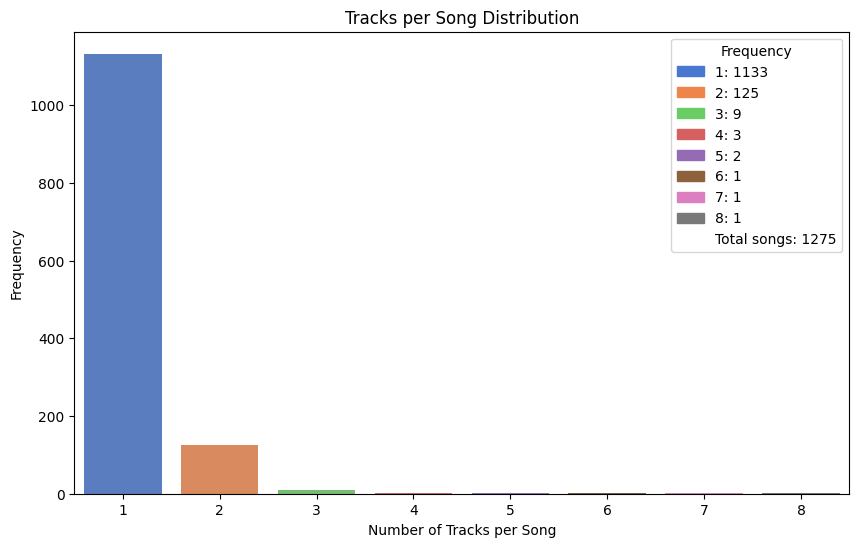

In [442]:
midi_metadata_df = load_json(midi_metadata)
plot_tracks_distribution(midi_metadata_df)

Plot saved to ../data/plots/Q_Distribution.png


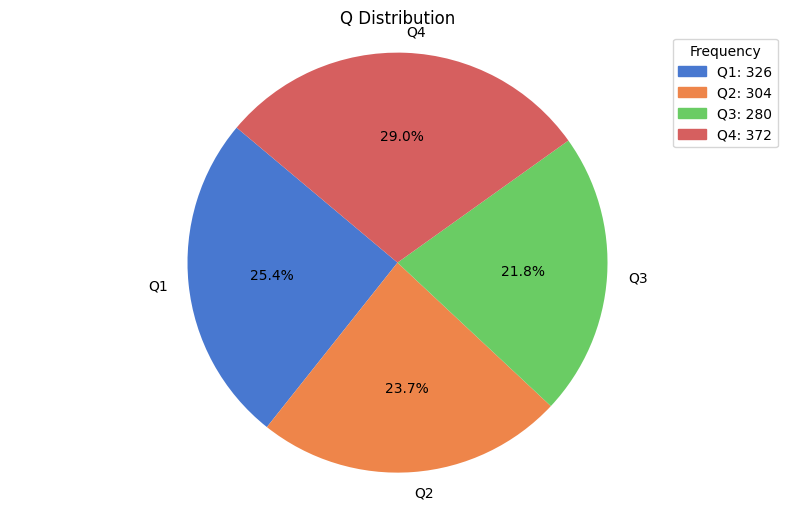

In [443]:
csv_metadata_df = load_json(csv_metadata)
plot_q_distribution(csv_metadata_df)

Plot saved to ../data/plots/Range_of_note_density_Violin_Plot.png


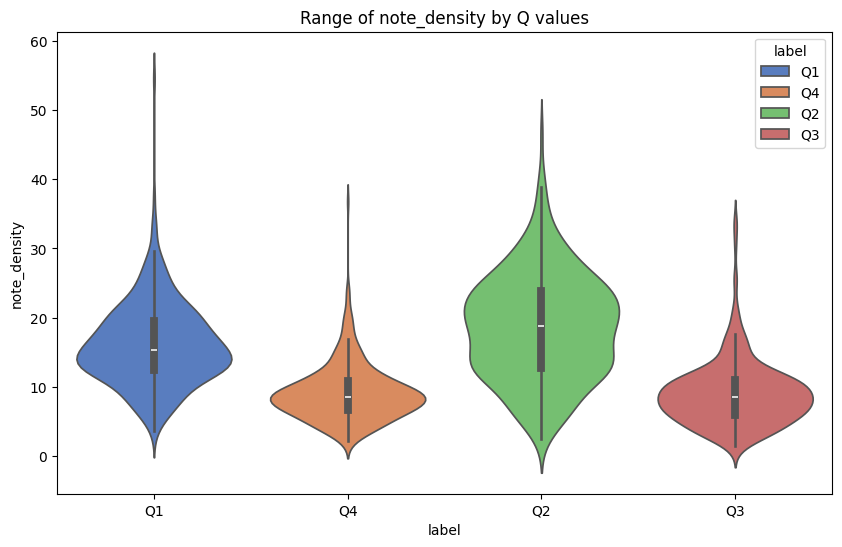

Plot saved to ../data/plots/Range_of_tempo_x_Violin_Plot.png


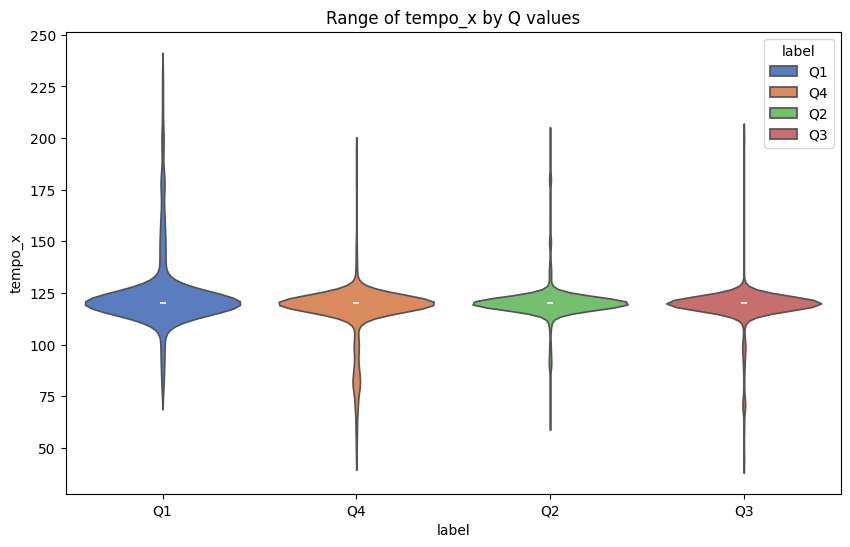

In [444]:
merged_df = pd.merge(midi_metadata_df, csv_metadata_df, on='name')
plot_value_range_per_Q(merged_df, 'note_density')
plot_value_range_per_Q(merged_df, 'tempo_x')

In [445]:
merged_df[merged_df['name'] == 'Q2_XfA2KXodrOE_1.mid']

,name,note_density,tempo_x,n_instruments,duration,label,keyname,tempo_y
629,Q2_XfA2KXodrOE_1.mid,27.608388,120.0,1,29.990885,Q2,e,122.011963


# Hay un error en los midi de vgmidi-master, parece que no lo está cogiendo bien

In [446]:
len(midi_metadata_df), len(csv_metadata_df), len(merged_df)

(1275, 1282, 1274)

In [447]:
len(midi_metadata_df) - len(merged_df)

1

In [448]:
intervalo = set(merged_df['tempo_x'])
print(f'Min {min(intervalo)} and {max(intervalo)}')

Min 45.000011250002814 and 230.00049833441307
